In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [3]:
from collections import Counter

### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(data["attack_flag"]))

Counter({-1: 149915, 1: 67713})


## Transform to binary

In [4]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 149915, 0: 67713})


## Visualize the attacks structure over time 

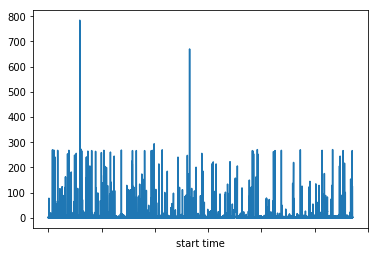

In [5]:
data_red = data.groupby('start time')['attack_flag'].sum()
data_red.plot()

In [6]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


1    149915
0     67713
Name: attack_flag, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [8]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,10106,17989,udp


In [9]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,0.688859,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.462961,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [10]:
# removing NaNs
data = data.dropna()
data.shape

(217628, 18)

In [11]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [12]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [13]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

# a bit of feature engineering

## data rate calculation

In [14]:
def ul(data_row):
    if (data_row["conn len"] > 0): 
       value = float(data_row["src bytes"]) / data_row["conn len"]
    else:
        value = 0
    return value

def dl(data_row):
    if (data_row["conn len"] > 0): 
        value = float(data_row["dst bytes"]) / data_row["conn len"]
    else:
        value = 0
    return value

data["upstream data rate"] = data.apply(ul, axis=1)
data["downstream data rate"] = data.apply(dl, axis=1)

In [15]:
data.loc[:, ["src bytes", "dst bytes", "conn len", "upstream data rate", "downstream data rate"]].head(20)

,src bytes,dst bytes,conn len,upstream data rate,downstream data rate
0,0,0,0.000000,0.000000,0.000000
1,0,0,0.000000,0.000000,0.000000
2,0,0,2.992004,0.000000,0.000000
3,0,0,3.014608,0.000000,0.000000
4,0,0,0.000000,0.000000,0.000000
5,0,0,0.000000,0.000000,0.000000
6,0,0,0.000000,0.000000,0.000000
7,0,0,0.000000,0.000000,0.000000
8,0,0,0.000000,0.000000,0.000000
9,0,0,0.000000,0.000000,0.000000


## port numbers classification

In [16]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [17]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 211216, 1: 6412})
Counter({1: 150534, 0: 67094})
Counter({0: 156946, 1: 60682})


In [18]:
def wk(data_row):
    if (data_row["dst port"] <= t1): 
        value = 1
    elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
        value = 0
    elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["dst port"] <= t1): 
        value = 0
    elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
        value = 1
    elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["dst port"] <= t1): 
        value = 0
    elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
        value = 0
    elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
        value = 1
    return value

data["well-known dst pool"] = data.apply(wk, axis=1)
data["registered dst pool"] = data.apply(reg, axis=1)
data["cli dst pool"] = data.apply(cli, axis=1)

In [19]:
print(Counter(data["well-known dst pool"]))
print(Counter(data["registered dst pool"]))
print(Counter(data["cli dst pool"]))

Counter({1: 155404, 0: 62224})
Counter({0: 163121, 1: 54507})
Counter({0: 209911, 1: 7717})


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 26 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [21]:
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool,well-known dst pool,registered dst pool,cli dst pool
0,40061,111,0,1,0,1,0,0
1,53488,80,0,0,1,1,0,0
2,35051,23,0,1,0,1,0,0
3,1408,445,0,1,0,1,0,0
4,55244,995,0,0,1,1,0,0
5,44544,995,0,1,0,1,0,0
6,50678,5900,0,0,1,0,1,0
7,35051,23,0,1,0,1,0,0
8,50678,5900,0,0,1,0,1,0
9,50678,5900,0,0,1,0,1,0


## Change port number info to categorical

In [22]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()
print(data['src port'].value_counts()[100])
print(data['dst port'].value_counts()[115])

thresh1 = 300
thresh2 = 300
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is")], axis=1)

96
91


In [23]:
data.shape

(217628, 101)

## Hot one encoding

In [24]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)


,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Columns: 125 entries, conn len to state_SHR
dtypes: float64(9), int64(12), object(5), uint8(99)
memory usage: 65.4+ MB


## Data visualization

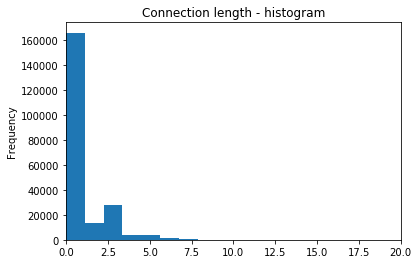

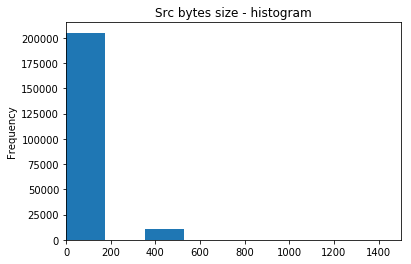

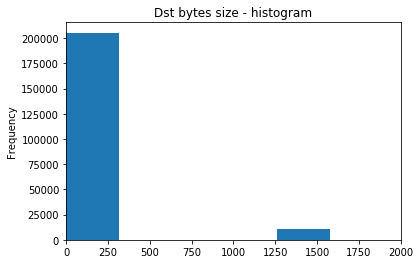

In [25]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=500, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

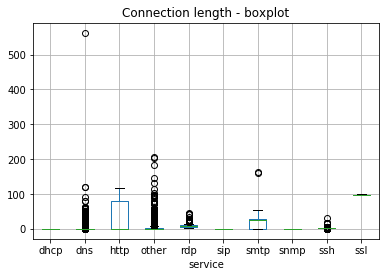

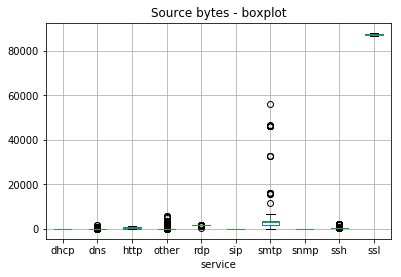

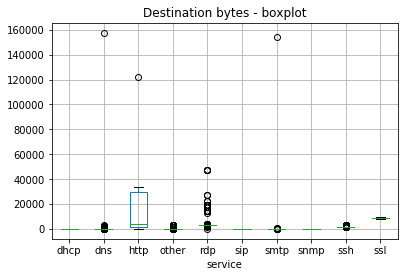

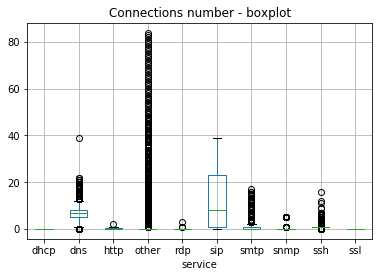

In [26]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

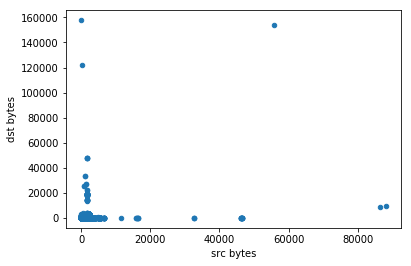

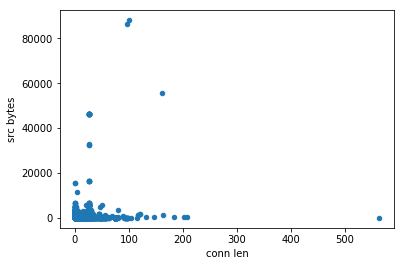

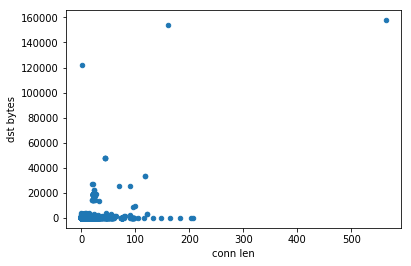

In [27]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [26]:
### drop categorical columns ####

data = data.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
#data = data.drop(["src port", "dst port"], axis=1)
data.shape

(217628, 120)

In [27]:
#data = data.drop(["upstream data rate", "downstream data rate"], axis=1)

## Plot function definition

In [28]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [29]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])
train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)
y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


## Logistic Regression

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
hyperparams = {'solver' : ['newton-cg', 'lbfgs', 'sag']}

In [34]:
#sorted(metrics.SCORERS.keys())

In [35]:
# clf = GridSearchCV(LogisticRegression(), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # {'solver': 'newton-cg'}

{'solver': 'newton-cg'}


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_validate)

name = "logistic Regression"

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Acc[name] = metrics.accuracy_score(y_validate, y_pred)
F1S[name] = metrics.f1_score(y_validate, y_pred)
Prec[name] = metrics.precision_score(y_validate, y_pred)
Rec[name] = metrics.recall_score(y_validate, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.99473, F1-score: 0.99121, Precision: 0.98337, Recall: 0.99918, FPR: 0.00715
TN: 22773; FP: 164; FN:    8; TP: 9699



# Decision Tree parameters selection

## Checking tree depth impact

In [39]:
# using gridsearchcv to find the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier(random_state=0).get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [40]:
hyperparams = {'max_depth' : range(1,12), 'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [41]:
# clf = GridSearchCV(DecisionTreeClassifier(random_state=0), hyperparams, cv=10, n_jobs=-1, scoring = "f1")
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # max depth : 11

{'max_depth': 11, 'max_features': None}


In [42]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_11":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 11),
               "DecisionTree_11":DecisionTreeClassifier(random_state=0, max_depth = 11),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99896, F1-score: 0.99825, Precision: 0.99876, Recall: 0.99773, FPR: 0.00052
TN: 22925; FP:  12; FN:   22; TP: 9685

Algorithm: DecisionTree_ent_11 Accuracy: 0.99877, F1-score: 0.99794, Precision: 0.99712, Recall: 0.99876, FPR: 0.00122
TN: 22909; FP:  28; FN:   12; TP: 9695

Algorithm: DecisionTree_11 Accuracy: 0.99828, F1-score: 0.99712, Precision: 0.99579, Recall: 0.99845, FPR: 0.00179
TN: 22896; FP:  41; FN:   15; TP: 9692



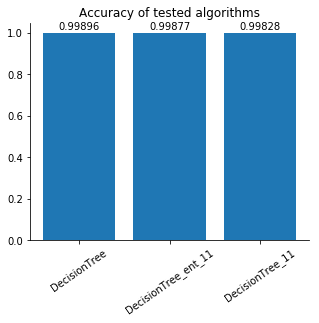

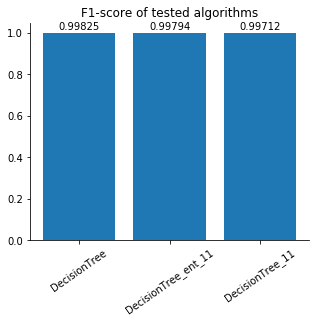

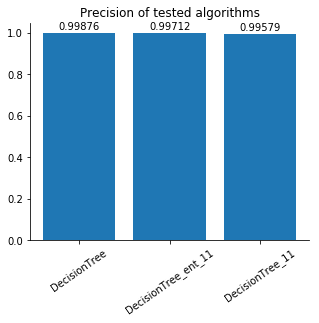

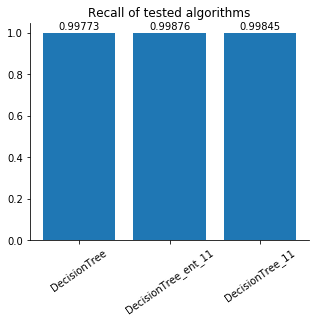

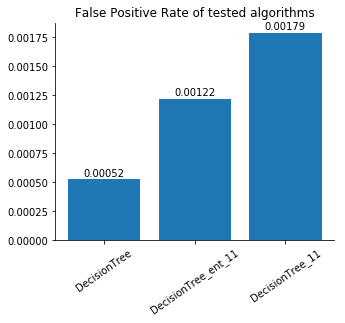

In [43]:
plot_stats(Acc, "Accuracy", 5, 35)
plot_stats(F1S, "F1-score", 5, 35)
plot_stats(Prec, "Precision", 5, 35)
plot_stats(Rec, "Recall", 5, 35)
plot_stats(FPR, "False Positive Rate", 5, 35)

## AdaBoost parameters selection

In [46]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth = 7)).get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 7,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [47]:
hyperparams = {"n_estimators" : range (1, 50)}

In [48]:
# clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=0)), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # Result: {'n_estimators': 48}, range tested: 1-50

{'n_estimators': 48}


In [51]:
num_trees = 48
seed = 12

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99890, F1-score: 0.99815, Precision: 0.99733, Recall: 0.99897, FPR: 0.00113
TN: 22911; FP:  26; FN:   10; TP: 9697

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99899, F1-score: 0.99830, Precision: 0.99733, Recall: 0.99928, FPR: 0.00113
TN: 22911; FP:  26; FN:    7; TP: 9700

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99887, F1-score: 0.99810, Precision: 0.99712, Recall: 0.99907, FPR: 0.00122
TN: 22909; FP:  28; FN:    9; TP: 9698

Algorithm: AdaBoost_n_est Accuracy: 0.99825, F1-score: 0.99707, Precision: 0.99507, Recall: 0.99907, FPR: 0.00209
TN: 22889; FP:  48; FN:    9; TP: 9698

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99825, F1-score: 0.99707, Precision: 0.99507, Recall: 0.99907, FPR: 0.00209
TN: 22889; FP:  48; FN:    9; TP: 9698

Algorithm: AdaBoost_orig Accuracy: 0.99828, F1-score: 0.99712, Precision: 0.99518, Recall: 0.99907, FPR: 0.00205
TN: 22890; FP:  47; FN:    9; TP: 9698



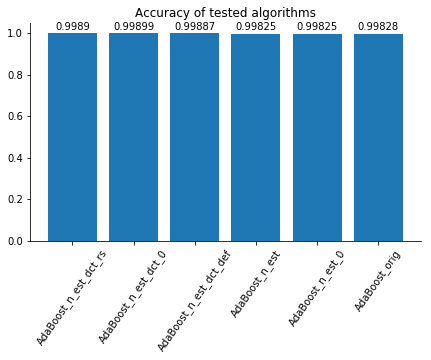

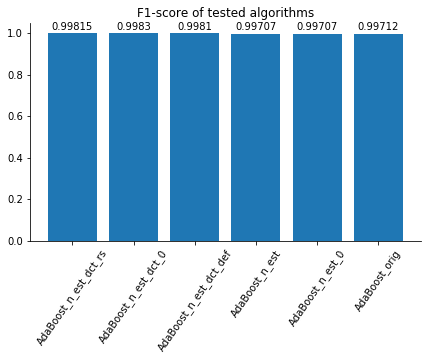

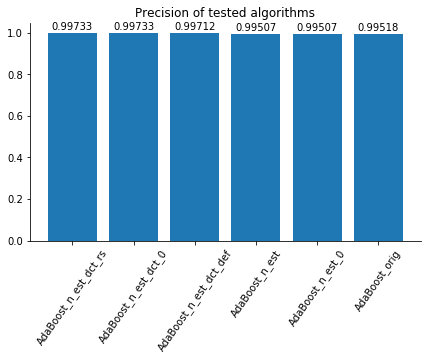

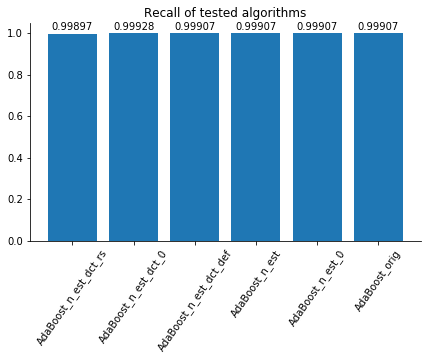

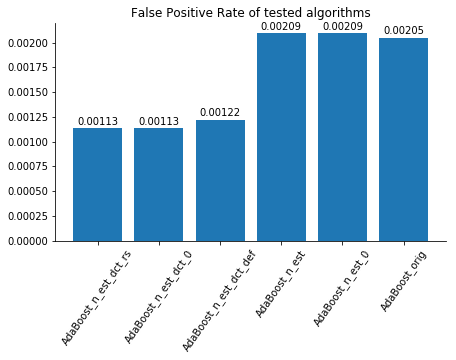

In [52]:
plot_stats(Acc, "Accuracy",7,  55)
plot_stats(F1S, "F1-score", 7, 55)
plot_stats(Prec, "Precision", 7, 55)
plot_stats(Rec, "Recall", 7, 55)
plot_stats(FPR, "False Positive Rate", 7, 55)

## Random tree parameters selection

In [53]:
hyperparams = {'max_depth' : range(1,12)}

In [57]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0, splitter = "random"), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
#clf.fit(X_train, y_train)

#print(clf.best_params_) # --> 11

{'max_depth': 11}


In [58]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_11":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 11),                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.99884, F1-score: 0.99804, Precision: 0.99845, Recall: 0.99763, FPR: 0.00065
TN: 22922; FP:  15; FN:   23; TP: 9684

Algorithm: RandomTree_11 Accuracy: 0.99651, F1-score: 0.99414, Precision: 0.99240, Recall: 0.99588, FPR: 0.00323
TN: 22863; FP:  74; FN:   40; TP: 9667



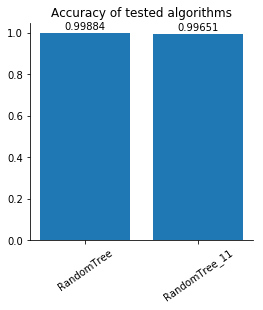

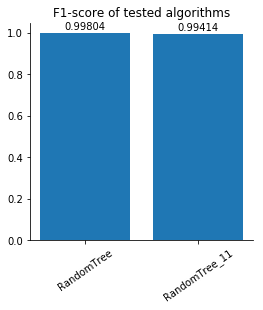

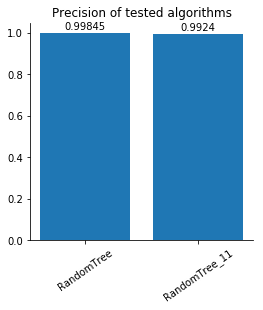

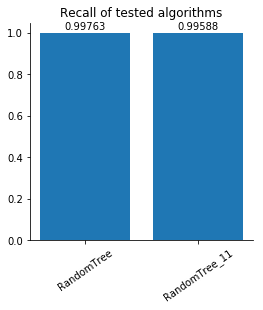

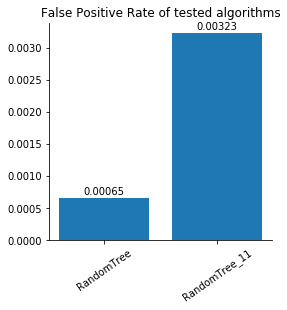

In [59]:
plot_stats(Acc, "Accuracy",4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

## Random Forest parameters selection

In [37]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [44]:
hyperparams = {'n_estimators' : range(1, 50)}

In [45]:
# clf = GridSearchCV(RandomForestClassifier(random_state=0), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # {'n_estimators': 46}

{'n_estimators': 46}


In [50]:
hyperparams = {'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [51]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=46), hyperparams, cv=5 ,scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)
# {'max_features': 'auto'}

In [46]:
hyperparams = {'max_depth' : range(1,50)}

In [47]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=46, max_features='auto'), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)
# {'max_depth': 27}

{'max_depth': 27}


In [49]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki
from sklearn import metrics

classifiers = {
                "RandomForest_new":RandomForestClassifier(n_estimators=46, max_depth=27, random_state=0),
                "RandomForest_orig":RandomForestClassifier(n_estimators=100),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest_new Accuracy: 0.99899, F1-score: 0.99830, Precision: 0.99712, Recall: 0.99948, FPR: 0.00122
TN: 22909; FP:  28; FN:    5; TP: 9702

Algorithm: RandomForest_orig Accuracy: 0.99899, F1-score: 0.99830, Precision: 0.99712, Recall: 0.99948, FPR: 0.00122
TN: 22909; FP:  28; FN:    5; TP: 9702



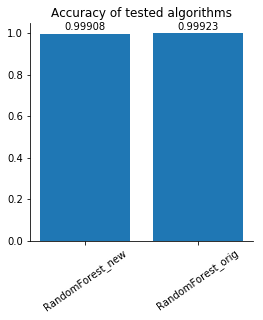

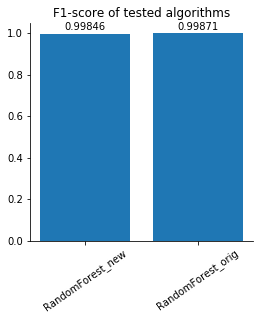

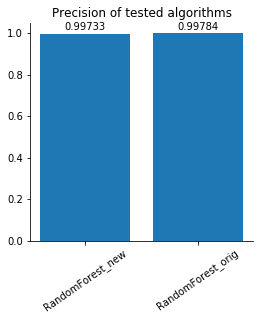

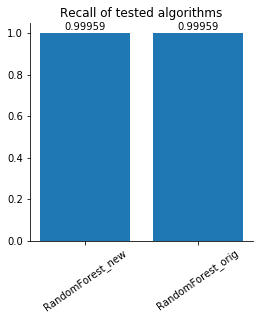

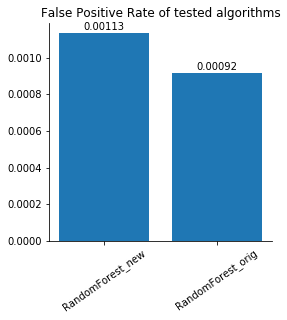

In [64]:
plot_stats(Acc, "Accuracy", 4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

# Algorithms' performance comparison

In [40]:
sampled_data = data.loc[range(150000), :]
train_alg, validate_alg, test_alg = np.split(sampled_data, [int(.7*len(sampled_data)), int(.85*len(sampled_data))])
train_alg = train_alg.sample(frac=1)
validate_alg = validate_alg.sample(frac=1)
test_alg = test_alg.sample(frac=1)
y_train_alg = train_alg.loc[:, "attack_flag"].values.ravel()
X_train_alg = train_alg.drop(["attack_flag"], axis=1)
y_validate_alg = validate_alg.loc[:, "attack_flag"].values.ravel()
X_validate_alg = validate_alg.drop(["attack_flag"], axis=1)
y_test_alg = test_alg.loc[:, "attack_flag"].values.ravel()
X_test_alg = test_alg.drop(["attack_flag"], axis=1)

print(Counter(y_test_alg))
print(Counter(y_validate_alg))
print(Counter(y_train_alg))

Counter({0: 14952, 1: 7548})
Counter({1: 14607, 0: 7893})
Counter({1: 86179, 0: 18821})


In [41]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({0: 14952, 1: 7548})


In [42]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.66453, F1-score: 0.00000, Precision: 0.00000, Recall: 0.00000, FPR: 0.00000
TN: 14952; FP:   0; FN: 7548; TP:   0



/home/matz/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/matz/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0)
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 48

classifiers = {"LogisticReg":LogisticRegression(solver = 'newton-cg'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=100),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/matz/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/matz/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/matz/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the numb

Algorithm: LogisticReg  Accuracy: 0.99253, F1-score: 0.98899, Precision: 0.97823, Recall: 1.00000, FPR: 0.01124
TN: 14784; FP: 168; FN:    0; TP: 7548

Algorithm: AdaBoost     Accuracy: 0.99911, F1-score: 0.99868, Precision: 0.99762, Recall: 0.99974, FPR: 0.00120
TN: 14934; FP:  18; FN:    2; TP: 7546

Algorithm: DecisionTree Accuracy: 0.99836, F1-score: 0.99755, Precision: 0.99643, Recall: 0.99868, FPR: 0.00181
TN: 14925; FP:  27; FN:   10; TP: 7538

Algorithm: NaiveBayes   Accuracy: 0.99133, F1-score: 0.98722, Precision: 0.97691, Recall: 0.99775, FPR: 0.01190
TN: 14774; FP: 178; FN:   17; TP: 7531

Algorithm: RandomTree   Accuracy: 0.99858, F1-score: 0.99788, Precision: 0.99748, Recall: 0.99828, FPR: 0.00127
TN: 14933; FP:  19; FN:   13; TP: 7535

Algorithm: RandomForest Accuracy: 0.99911, F1-score: 0.99868, Precision: 0.99762, Recall: 0.99974, FPR: 0.00120
TN: 14934; FP:  18; FN:    2; TP: 7546



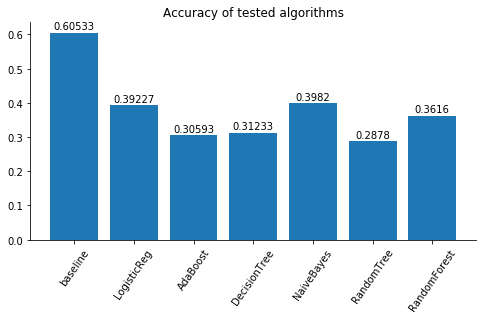

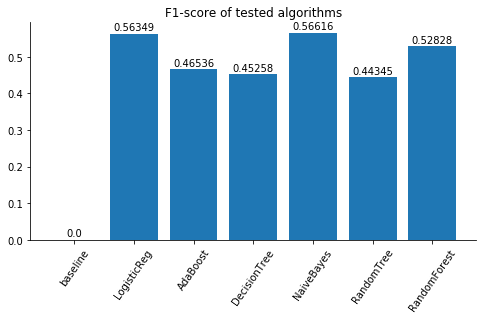

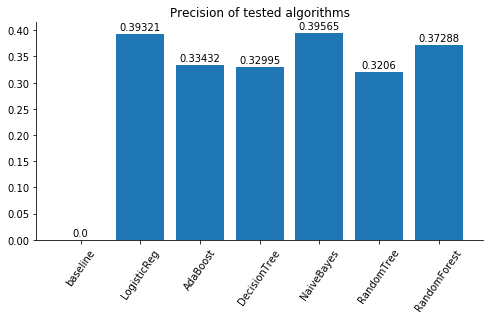

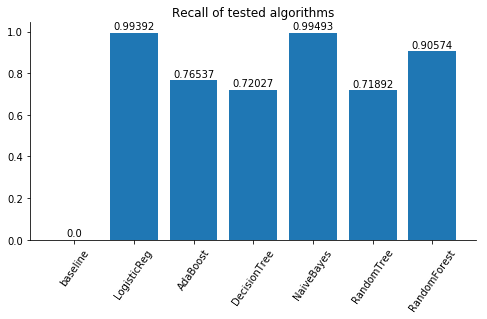

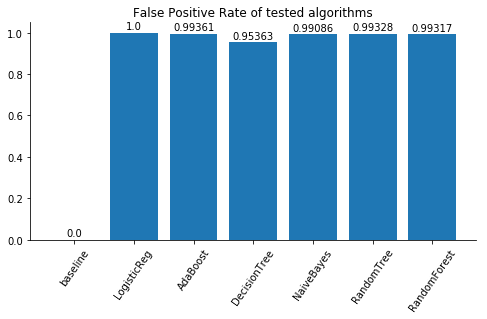

In [39]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Scaling

In [63]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

seed = 12

classifiers = {"LogisticReg":LogisticRegression(solver = 'newton-cg'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=100),
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: LogisticReg_scaled Accuracy: 0.97761, F1-score: 0.98820, Precision: 0.98754, Recall: 0.98885, FPR: 0.22719
TN: 1313; FP: 386; FN:  345; TP: 30601



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: AdaBoost_scaled Accuracy: 0.98833, F1-score: 0.99382, Precision: 0.99707, Recall: 0.99060, FPR: 0.05297
TN: 1609; FP:  90; FN:  291; TP: 30655



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: DecisionTree_scaled Accuracy: 0.98680, F1-score: 0.99301, Precision: 0.99658, Recall: 0.98947, FPR: 0.06180
TN: 1594; FP: 105; FN:  326; TP: 30620



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: NaiveBayes_scaled Accuracy: 0.72936, F1-score: 0.83386, Precision: 0.99726, Recall: 0.71647, FPR: 0.03590
TN: 1638; FP:  61; FN: 8774; TP: 22172



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomTree_scaled Accuracy: 0.98551, F1-score: 0.99233, Precision: 0.99571, Recall: 0.98898, FPR: 0.07769
TN: 1567; FP: 132; FN:  341; TP: 30605



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest_scaled Accuracy: 0.98805, F1-score: 0.99368, Precision: 0.99636, Recall: 0.99102, FPR: 0.06592
TN: 1587; FP: 112; FN:  278; TP: 30668



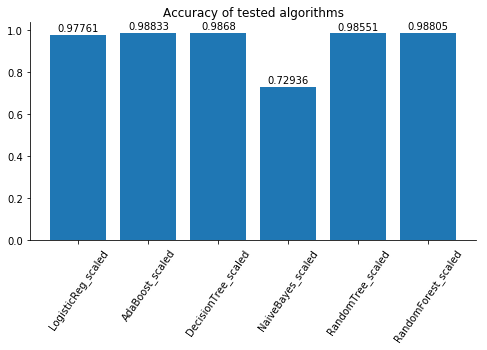

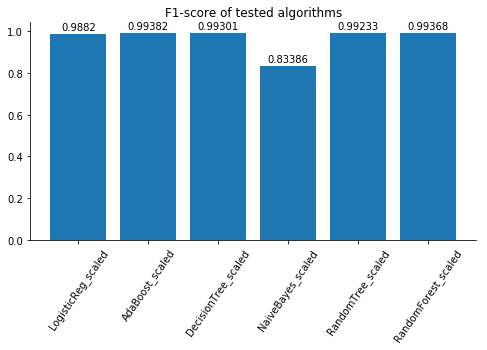

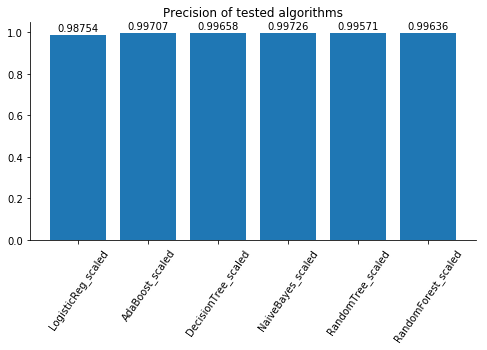

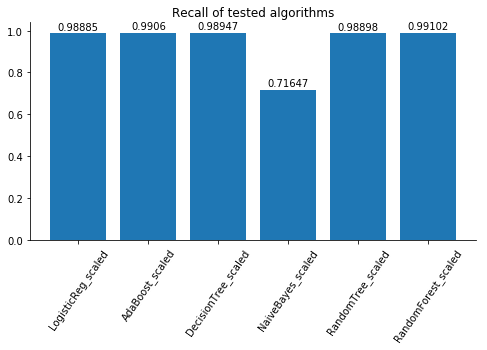

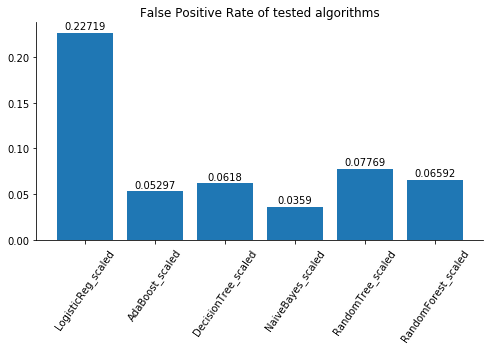

In [64]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [28]:
# Metrics of baseline method

y_pred = {}

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)    

In [29]:
classifiers = {"LogisticReg":LogisticRegression(solver = 'newton-cg'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=100),
              }

 

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred[name] = model.predict(X_test)

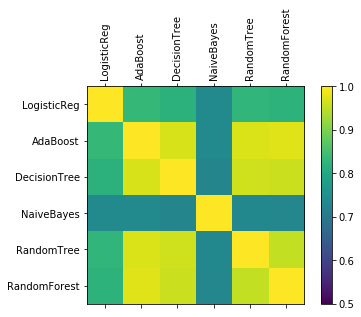

In [30]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [31]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.833054      0.822247    0.737755    0.828900   
AdaBoost         0.833054  1.000000      0.969919    0.739959    0.971118   
DecisionTree     0.822247  0.969919      1.000000    0.727423    0.963321   
NaiveBayes       0.737755  0.739959      0.727423    1.000000    0.733055   
RandomTree       0.828900  0.971118      0.963321    0.733055    1.000000   
RandomForest     0.823220  0.975010      0.960447    0.732302    0.955011   

              RandomForest  
LogisticReg       0.823220  
AdaBoost          0.975010  
DecisionTree      0.960447  
NaiveBayes        0.732302  
RandomTree        0.955011  
RandomForest      1.000000  


In [36]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)   


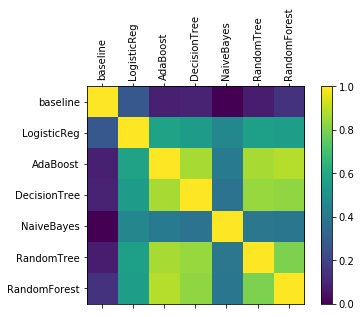

In [80]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest"]
#names = ["baseline", "LogisticReg", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [71]:
print(correlations)

              baseline  LogisticReg  RandomForest
baseline      1.000000     0.273921      0.145045
LogisticReg   0.273921     1.000000      0.561166
RandomForest  0.145045     0.561166      1.000000


In [78]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

Counter({1: 30946, 10: 1699})
Counter({1: 31754, 10: 891})
Counter({1: 32252, 10: 393})
Counter({1: 32197, 10: 448})
Counter({1: 30981, 10: 1664})
Counter({1: 32223, 10: 422})
Counter({1: 32227, 10: 418})
[[30946.0, 31754.0, 32252.0, 32197.0, 30981.0, 32223.0, 32227.0], [1699.0, 891.0, 393.0, 448.0, 1664.0, 422.0, 418.0]]


In [79]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

probability=0.950, critical=12.592, stat=2573.520

reject H0 - results dependent
